In [1]:
import pandas as pd 
import numpy as np # importing libraries 1

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns # importing libraries 2

In [3]:
sns.set(rc={'figure.figsize': (50, 30)}) # plot(1) castomization, for better readability

In [4]:
events_data = pd.read_csv('event_data_train.csv') # reading a csv file:
                                                                             # event_data_train.csv 

In [5]:
submissions_data = pd.read_csv('submissions_data_train.csv') # reading a csv file:
                                                                                       # submissions_data_train.csv 

In [6]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [7]:
submissions_data.head() 

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [8]:
submissions_data.submission_status.unique()

array(['correct', 'wrong'], dtype=object)

In [9]:
events_data.action.unique() # begin of data exploration

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [10]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s') # creating a column with the usual time type

In [11]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [12]:
events_data.head(10)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [13]:
events_data['day'] = events_data.date.dt.date # creating a column with the day of the event

In [14]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


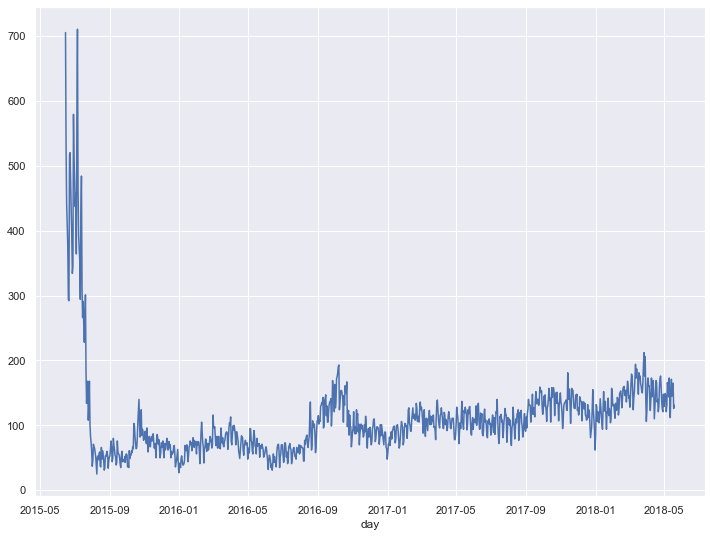

In [124]:
events_data.groupby('day') \
    .user_id.nunique().plot() # plot(1) of new students arrival by date

In [16]:
# wrong decision: forgot the users who have passed 0 steps:

# events_data[events_data.action == 'passed'] \
#    .groupby('user_id', as_index=False) \
#    .agg({'step_id': 'count'}) \
#    .rename(columns = {'step_id': 'passed_steps'}).passed_steps.hist() 

In [17]:
users_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index() # datframe: user classification by type of action

In [18]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


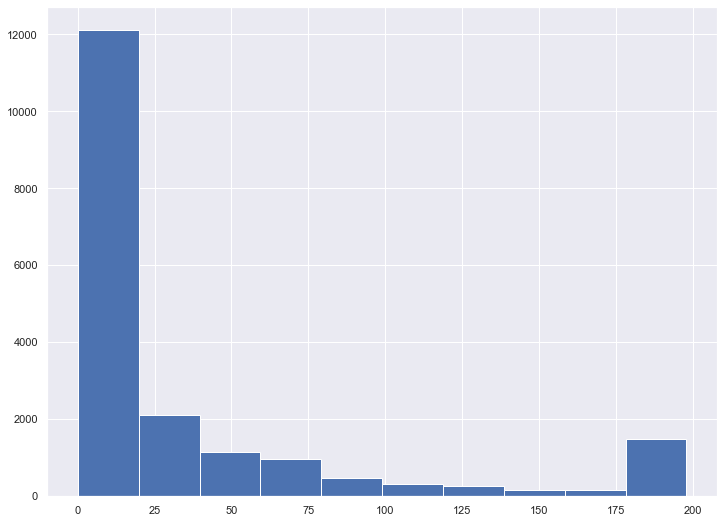

In [125]:
events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index().discovered.hist() # plot: 
                                                                      # discovery values from the previous df

In [20]:
                        # CREATING VALID DATAFRAME FOR FUTURE ANALITICS #

In [21]:
users_scores = submissions_data.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

In [22]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [23]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [24]:
gap_data = gap_data / (60 * 60 * 24)

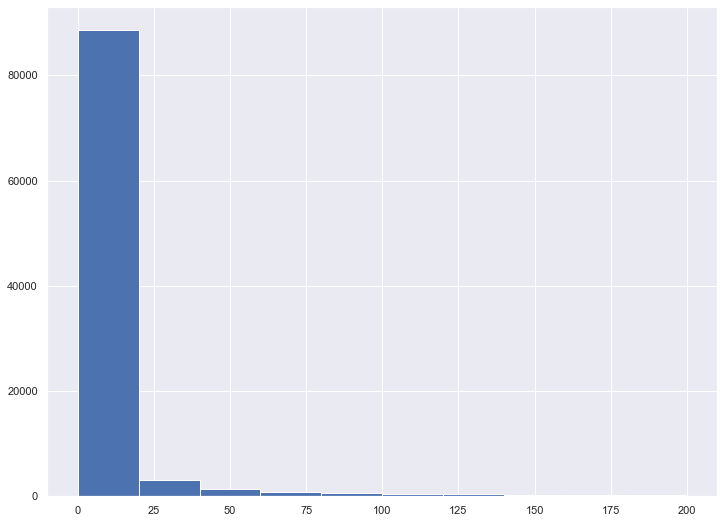

In [126]:
gap_data[gap_data < 200].hist()

In [26]:
gap_data.quantile(0.91)

22.064939004629633

In [27]:
30 * 60 * 60 * 24 # threshold value of timestamp

2592000

In [28]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [29]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns = {'timestamp': 'last_timestamp'})

In [30]:
users_data

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [31]:
now = 1526772811
drop_out_threshold = 2592000

In [32]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold # dropped - True, stayed - False

In [33]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [34]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [35]:
users_data = users_data.merge(users_scores, on='user_id', how='outer') # jointing users_scores to users_data

In [36]:
users_data = users_data.fillna(0)

In [37]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [38]:
users_data.shape

(19234, 5)

In [39]:
users_data = users_data.merge(users_events_data, how='outer') # jointing users_events_data to users_data

In [40]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [41]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [42]:
users_data = users_data.merge(users_days, how='outer') # jointing users_days to users_data

In [43]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [44]:
users_data.user_id.nunique() # check

19234

In [45]:
events_data.user_id.nunique() # check sucсessfully finished

19234

In [46]:
users_data['passed_course'] = users_data.passed > 170 # users, who passed the course
                                                     # passed - True, drop - False

In [47]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [48]:
count_users_passed_course = 100 * 1425 / 17809

In [49]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [50]:
# users_data.day.max() # 1.11 step 5

In [51]:
# users_data.query('day == 478') # 1.11 step 5, solution: 1046

In [52]:
users_data[users_data.passed_course].day.median() # median course completion time

20.0

In [53]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
        .rename({'timestamp': 'min_timestamp'}, axis=1) # when the user did the first action

In [54]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [55]:
users_data = users_data.merge(user_min_time, how='outer') # merge users_data and user_min_time dataframes

In [56]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [57]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [58]:
events_data_train = pd.DataFrame()

In [59]:
#for user_id in users_data.user_id:
#   min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
#   time_threshold = min_user_time + 3 * 24 * 60 * 60
#
#   user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_threshold)]
#
#   events_data_train = events_data_train.append(user_events_data)

In [60]:
# event_data_train = events_data[]

In [61]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str) # concatenation user_id and timestamp

In [62]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [63]:
learning_time_threshold = 20 * 24 * 60 * 60
learning_time_threshold

1728000

In [64]:
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [65]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str) # concatenation user_id and unique threshold time for each user

In [66]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold # creating a new column

In [67]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer') # merging events_data and last two dataframes

In [68]:
events_data

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1436068848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1436068848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1436068848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1436068848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1436068848
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1528490664
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1528490664
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1528500750
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1528500750


In [69]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold] # selecting actions that occurred during three unique days for each user

In [70]:
events_data_train

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1436068848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1436068848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1436068848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1436068848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1436068848
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1528490664
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1528490664
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1528500750
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1528500750


In [71]:
events_data_train.groupby('user_id').day.nunique().max() # checking 

21

In [72]:
user_min_time.head(1)

,user_id,min_timestamp,user_learning_time_threshold
0,1,1472827464,1_1474555464


In [73]:
submissions_data.head(1)

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15


In [74]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str) # creating dataframe for predicting
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]

In [75]:
submissions_data_train

,step_id,timestamp,submission_status,user_id,date,day,users_time,user_learning_time_threshold
0,31971.0,1.434349e+09,correct,15853,2015-06-15 06:21:15,2015-06-15,15853_1434349275,15853_1436073977
1,31972.0,1.434348e+09,correct,15853,2015-06-15 06:05:00,2015-06-15,15853_1434348300,15853_1436073977
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 06:02:03,2015-06-15,15853_1434348123,15853_1436073977
5,31976.0,1.434348e+09,correct,15853,2015-06-15 06:03:08,2015-06-15,15853_1434348188,15853_1436073977
7,31977.0,1.434347e+09,correct,15853,2015-06-15 05:49:31,2015-06-15,15853_1434347371,15853_1436073977
...,...,...,...,...,...,...,...,...
509099,120745.0,1.501947e+09,wrong,2615,2017-08-05 15:29:19,2017-08-05,2615_1501946959,2615_1503674660
509100,120745.0,1.503060e+09,correct,13177,2017-08-18 12:38:47,2017-08-18,13177_1503059927,13177_1504783287
509101,120745.0,1.506348e+09,wrong,15253,2017-09-25 14:02:33,2017-09-25,15253_1506348153,15253_1508075263
509102,120745.0,1.523035e+09,wrong,1424,2018-04-06 17:21:56,2018-04-06,1424_1523035316,1424_1524763269


In [76]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
    .rename(columns={'day': 'days'})# creating X dataframe. column 'day': how many unique days did the user spend on the course in three days

In [77]:
X.head(3)

,user_id,days
0,2,1
1,3,1
2,8,1


In [78]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id': 'steps_tried'}) # creating X dataframe. column 'steps_tried': how many unique steps did the user try to pass in three days

In [79]:
steps_tried.head()

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,53


In [80]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [81]:
X.head()

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,10,53


In [82]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index())

In [83]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [84]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.000000
1,3,1,4,4,4,0.500000
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,10,53,52,69,0.429752


In [85]:
X = X.merge(events_data_train.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [86]:
X = X.fillna(0)

In [87]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [88]:
X = X[~((X.is_gone_user == False) & (X.passed_course == False))]

In [89]:
y = X.passed_course.map(int)

In [90]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [91]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.000000,9
1,3,1.0,4.0,4.0,4.0,0.500000,20
2,8,1.0,11.0,9.0,21.0,0.300000,156
3,14,1.0,1.0,0.0,1.0,0.000000,9
4,16,10.0,53.0,52.0,69.0,0.429752,288


In [122]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

In [93]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [94]:
X.head(1)

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.0,9


In [95]:
is_passed_df = X.merge(users_data[['user_id', 'passed_course']])

In [96]:
is_passed_df

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course
0,2,1.0,2.0,2.0,0.0,1.000000,9,False
1,3,1.0,4.0,4.0,4.0,0.500000,20,False
2,8,1.0,11.0,9.0,21.0,0.300000,156,False
3,14,1.0,1.0,0.0,1.0,0.000000,9,False
4,16,10.0,53.0,52.0,69.0,0.429752,288,True
...,...,...,...,...,...,...,...,...
17980,26774,0.0,0.0,0.0,0.0,0.000000,1,False
17981,26781,0.0,0.0,0.0,0.0,0.000000,6,True
17982,26788,0.0,0.0,0.0,0.0,0.000000,1,False
17983,26789,0.0,0.0,0.0,0.0,0.000000,2,False


In [97]:
is_passed_df.passed_course.unique() 

array([False,  True])

In [98]:
is_passed_df.passed_course.dtype

dtype('bool')

In [99]:
X = is_passed_df.drop(['passed_course'], axis=1)
y = is_passed_df.passed_course

In [100]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.000000,9
1,3,1.0,4.0,4.0,4.0,0.500000,20
2,8,1.0,11.0,9.0,21.0,0.300000,156
3,14,1.0,1.0,0.0,1.0,0.000000,9
4,16,10.0,53.0,52.0,69.0,0.429752,288
...,...,...,...,...,...,...,...
17980,26774,0.0,0.0,0.0,0.0,0.000000,1
17981,26781,0.0,0.0,0.0,0.0,0.000000,6
17982,26788,0.0,0.0,0.0,0.0,0.000000,1
17983,26789,0.0,0.0,0.0,0.0,0.000000,2


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size=0.75)

In [102]:
clf = tree.DecisionTreeClassifier()

In [103]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 100)}

In [104]:
search_clf = GridSearchCV(clf, parameters, cv=5)

In [105]:
search_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)})

In [106]:
search_clf.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [107]:
best_clf = search_clf.best_estimator_

In [108]:
y_pred = best_clf.predict(X_test)

In [109]:
y_pred

array([False, False, False, ..., False, False, False])

In [110]:
best_clf.score(X_test, y_test)

0.9530798309984434

In [111]:
precision_score(y_test, y_pred)

0.8227272727272728

In [112]:
recall_score(y_test, y_pred)

0.5127478753541076

In [113]:
p = precision_score(y_test, y_pred)

In [114]:
r = recall_score(y_test, y_pred)

In [115]:
y_predicted_prob = best_clf.predict_proba(X_test)

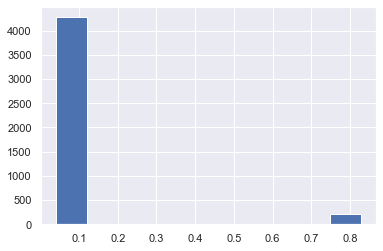

In [116]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [117]:
y_pred_rec = np.where(y_predicted_prob[:, 1] < 0.05, 1, 0)

In [118]:
precision_score(y_test, y_pred)

0.8227272727272728

In [119]:
recall_score(y_test, y_pred)

0.5127478753541076

In [120]:
2*precision_score(y_test, y_pred)*recall_score(y_test, y_pred)/(precision_score(y_test, y_pred)+recall_score(y_test, y_pred))

0.631762652705061

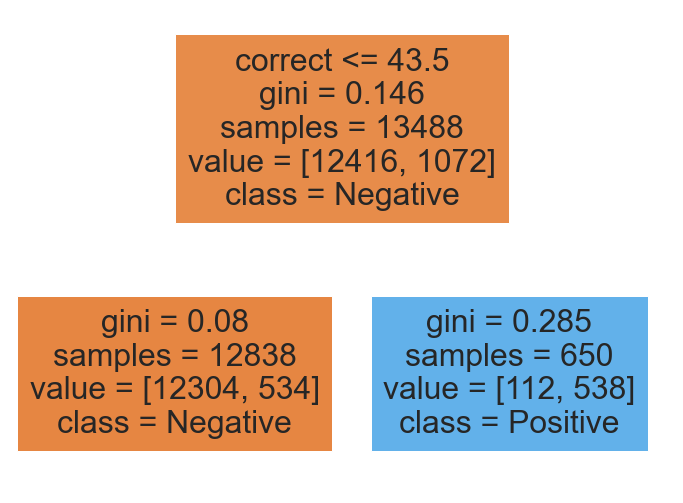

In [123]:
tree.plot_tree(best_clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True);